<b>Цель работы</b><br>
Провести триангуляцию пространства, ограниченного двумя электродами.
<br><br>
<b>Условие задания</b><br>
$f_1(x)=2 + cos(2x)^2$<br>
$f_2(x)=6$<br>
$x \in[0, 0.001, \pi]$

<b>Ход работы</b><br>
Сначала вычислим значения координат электродов

In [77]:
import math
import numpy as np

def cart2pol(x, y): #Декартовы координаты в полярные
    r = np.sqrt(x**2 + y**2)
    φ = np.arctan2(y, x)
    return(r, φ)

def pol2cart(r, φ): # Полярные в декартовы
    x = r * np.cos(φ)
    y = r * np.sin(φ)
    return(x, y)

get_coords_lists = lambda space: (
    [coords[0] for coords in space],
    [coords[1] for coords in space]
)

mass_pol2cart = lambda space: [pol2cart(*pol) for pol in space]

f_1 = lambda φ: 2 + (math.cos(2 * φ))**2
f_2 = lambda φ: 6
N = 75
φ_space = np.linspace(0, 2 * np.pi, N)
pol_space_1 = [(f_1(φ), φ) for φ in φ_space]
pol_space_2 = [(f_2(φ), φ) for φ in φ_space]
cart_space_1 = mass_pol2cart(pol_space_1)
cart_space_2 = mass_pol2cart(pol_space_2)
e1_x, e1_y = get_coords_lists(cart_space_1)
e2_x, e2_y = get_coords_lists(cart_space_2)

Теперь произведём построение электродов, чтобы убедится в правильности выполнения предыдущего пункта

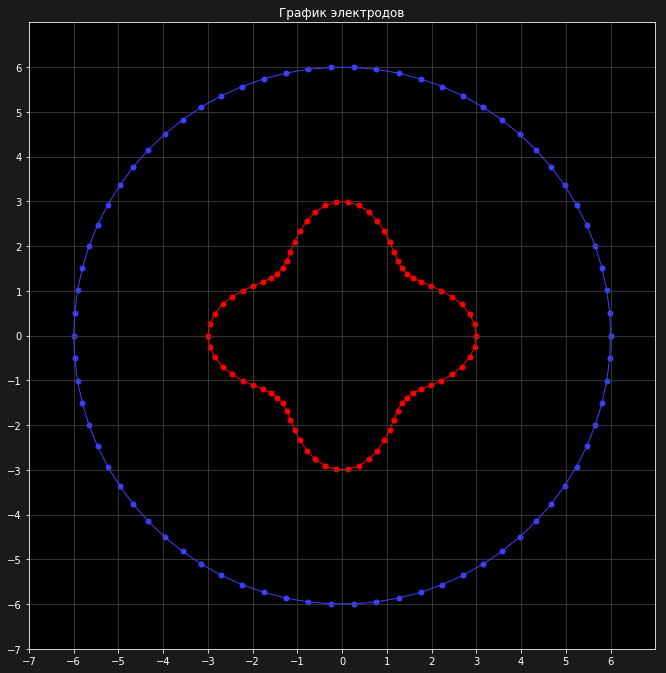

In [78]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('dark_background')

def init_figure(num):
    figure = plt.figure(num=num, figsize=(10,10), facecolor='0.1')
    axes = figure.add_axes([0.1, 0.1, 0.87, 0.87])
    axes.set_title('График электродов')
    axes.set_xlim(-7, 7)
    axes.set_ylim(-7, 7)
    axes.set_xticks(np.arange(-7, 7))
    axes.set_yticks(np.arange(-7, 7))
    axes.grid(color='0.25')
    return figure, axes

def plot(x_s, y_s, col, axes):
    axes.scatter(x_s, y_s, color=col, s=25)
    axes.plot(x_s, y_s, linewidth=1.0, color=col)

def plot_electrodes(figure, axes):
    plot(e1_x, e1_y, 'r', axes)
    plot(e2_x, e2_y, '#3e3eff', axes)
    return figure, axes

graph = init_figure(0)
plot_electrodes(*graph)
plt.show()

Добавим дополнительные узлы между электродами

In [81]:
circle_space = lambda r: [(r + (math.cos(2 * φ))**2, φ) for φ in φ_space]
pts_space_1 = circle_space(3)
pts_space_2 = circle_space(4)
pts_space_3 = circle_space(5)
cart_space = mass_pol2cart(pts_space_1) + mass_pol2cart(pts_space_2) + mass_pol2cart(pts_space_3)
a_x, a_y = get_coords_lists(cart_space)

def plot_additional(figure, axes, add):
    for a in add:
        plot(a[0], a[1], 'y', axes)
    return figure, axes

Теперь проведем триангуляцию. Для этого используем модуль tri библиотеки matplotlib

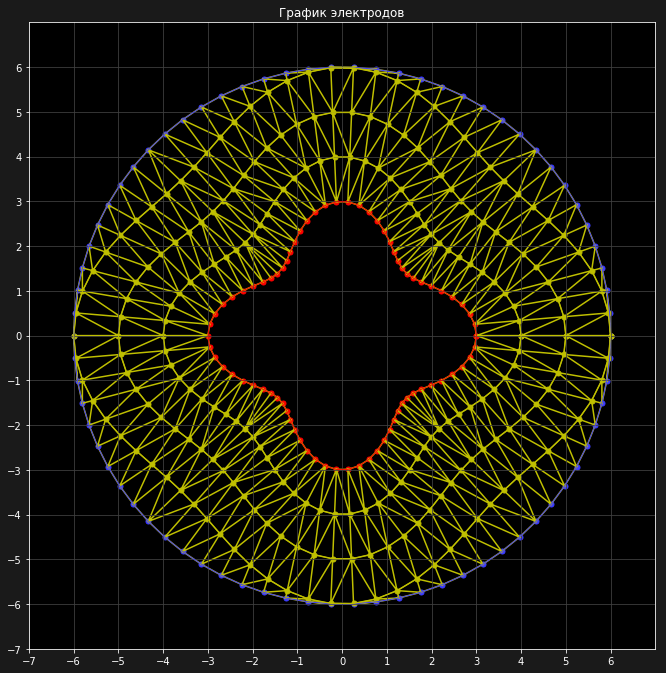

In [82]:
from matplotlib import tri

def plot_triangulation(figure, axes):
    x_s, y_s =  np.array(e1_x + e2_x + a_x), np.array(e1_y + e2_y + a_y)
    tr = tri.Triangulation(x_s, y_s)
    x_tr, y_tr = x_s[tr.triangles].mean(axis=1), y_s[tr.triangles].mean(axis=1)
    mask_func = lambda x, y: (
        lambda pol = cart2pol(x,y):(
            f_1(pol[1]) > pol[0]
        )
    )()
    mask_array = [mask_func(*point) for point in zip(x_tr, y_tr)]
    tr.set_mask(mask_array)
    axes.triplot(tr, color='y')   

graph = init_figure(1)
graph = plot_electrodes(*graph)
graph = plot_additional(*graph, [(a_x, a_y)])
graph = plot_triangulation(*graph)

plt.show()

<b>Вывод</b><br>
Исследованы возможности решения задачи триангуляции электродов с помощью библиотеки matplotlib